In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install python_speech_features

  Created wheel for python-speech-features: filename=python_speech_features-0.6-cp36-none-any.whl size=5890 sha256=ef5aae14491ca80ed278452b5407c98d2a4f868608fd57595bc755d66ef98bb2
  Stored in directory: /root/.cache/pip/wheels/3c/42/7c/f60e9d1b40015cd69b213ad90f7c18a9264cd745b9888134be
Successfully built python-speech-features


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import cv2 as cvlib
from matplotlib.pyplot import imshow
import pylab
import wave
import array
from scipy import signal
from scipy.fftpack import dct
from python_speech_features import mfcc
from python_speech_features import logfbank
import scipy.io.wavfile as wav
import pandas as pd 



from sklearn.metrics import confusion_matrix
import seaborn as sns


from keras import layers
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
K.set_image_data_format('channels_last')

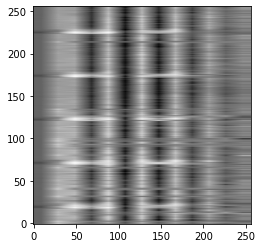

In [ ]:
path_to_one_sound = "/content/drive/MyDrive/ESC-50-master/audio/3-143933-A-38.wav"
(rate,sig) = wav.read(path_to_one_sound)
mfcc_feat = mfcc(signal=sig ,samplerate=16000, winlen=0.05, winstep=0.025, numcep=13, nfilt=26, nfft=800)
mfcc_new_img=cvlib.resize(mfcc_feat,(256,256))
imshow(mfcc_new_img,origin='lower',cmap='Greys')

In [ ]:
def getmfccs(path):
  (rate,sig) = wav.read(path)
  mfcc_feat = mfcc(signal=sig ,samplerate=16000, winlen=0.05, winstep=0.025, numcep=256, nfilt=26, nfft=800)
  mfcc_new_img=cvlib.resize(mfcc_feat,(256,256))
  # imshow(mfcc_new_img,origin='lower',cmap='Greys')
  return mfcc_new_img

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ESC-50-master/meta/esc50.csv')
data = data[['filename', 'target']]
X_full = np.empty((2000, 256, 256))
for i in range(2000): 
  path = '/content/drive/MyDrive/ESC-50-master/audio/' + data['filename'].loc[i] 
  result = getmfccs(path) 
  X_full[i] = np.array([result])

In [ ]:
X_full.shape

(2000, 256, 256)

In [ ]:
def AlexNet(input_shape):
    
    X_input = Input(input_shape)
    
    X = Conv2D(96,(11,11),strides = 4,name="conv0")(X_input)
    X = BatchNormalization(axis = 3 , name = "bn0")(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max0')(X)
    
    X = Conv2D(256,(5,5),padding = 'same' , name = 'conv1')(X)
    X = BatchNormalization(axis = 3 ,name='bn1')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max1')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv3')(X)
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(256, (3,3) , padding = 'same' , name='conv4')(X)
    X = BatchNormalization(axis = 3, name = 'bn4')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max2')(X)
    
    X = Flatten()(X)
    
    X = Dense(4096, activation = 'relu', name = "fc0")(X)
    
    X = Dense(4096, activation = 'relu', name = 'fc1')(X) 
    
    X = Dense(50,activation='softmax',name = 'fc2')(X)
    
    model = Model(inputs = X_input, outputs = X, name='AlexNet')

    model.compile(optimizer = 'SGD' , loss = 'sparse_categorical_crossentropy' , metrics=['accuracy'])
    return model

In [ ]:
Y_full=data['target']
train_size = 1650
X_tr_full = X_full[0:train_size]
Y_tr_full = Y_full[0:train_size]

X_ts = X_full[train_size:]
Y_ts = Y_full[train_size:]
print(X_tr_full.shape)
print(Y_tr_full.shape)
print(X_ts.shape)
print(Y_ts.shape)

(1650, 256, 256)
(1650,)
(350, 256, 256)
(350,)


In [ ]:
myAlex = AlexNet((256, 256, 1))
history = myAlex.fit(X_tr_full, Y_tr_full, epochs=50)

In [ ]:
myAlex.evaluate(X_ts, Y_ts)

In [ ]:
myAlex = AlexNet((256, 256, 1))
history = myAlex.fit(X_tr_full, Y_tr_full, epochs=15)

Epoch 1/15
52/52 [==============================] - 9s 32ms/step - loss: 4.8431 - accuracy: 0.0827
Epoch 2/15
52/52 [==============================] - 1s 28ms/step - loss: 2.5701 - accuracy: 0.2994
Epoch 3/15
52/52 [==============================] - 1s 28ms/step - loss: 2.0509 - accuracy: 0.4230
Epoch 4/15
52/52 [==============================] - 1s 28ms/step - loss: 1.5406 - accuracy: 0.5651
Epoch 5/15
52/52 [==============================] - 1s 29ms/step - loss: 1.2260 - accuracy: 0.6364
Epoch 6/15
52/52 [==============================] - 1s 28ms/step - loss: 0.8488 - accuracy: 0.7498
Epoch 7/15
52/52 [==============================] - 2s 29ms/step - loss: 0.6401 - accuracy: 0.8179
Epoch 8/15
52/52 [==============================] - 1s 28ms/step - loss: 0.3888 - accuracy: 0.9136
Epoch 9/15
52/52 [==============================] - 1s 29ms/step - loss: 0.3182 - accuracy: 0.9168
Epoch 10/15
52/52 [==============================] - 1s 29ms/step - loss: 0.1529 - accuracy: 0.9704
Epoch 11/

In [ ]:
myAlex.evaluate(X_ts, Y_ts)

11/11 [==============================] - 0s 21ms/step - loss: 1.8511 - accuracy: 0.5171


[1.8510805368423462, 0.5171428322792053]

In [ ]:

def plot_loss(history):
  history_df = pd.DataFrame(history.history)
  history_df.plot(figsize=(8, 6))
  return

def plot_heat_map(y_test, y_pred, label_list):
  percent_df=pd.DataFrame(np.zeros(2500, dtype=int).reshape(50,50))
  conf_matrix = confusion_matrix(y_test, y_pred.argmax(axis=1))
  conf_matrix = pd.DataFrame(conf_matrix, index=label_list, columns=label_list)
  plt.figure(figsize = (20,15))
  plt.title('MFCC SGD')
  sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', )
  plt.savefig('res_MFCC_SGD.png')
  plt.figure(figsize = (60,50))
  plt.title('MFCC SGD(%)')
  for i in range(50):
    for j in range(50):
      percent_df.iloc[i,j]=conf_matrix.iloc[i,j]/np.sum(conf_matrix.iloc[i])
  percent_df.index=label_list
  percent_df.columns=label_list
  sns.heatmap(percent_df, annot=True, fmt='.2%', cmap='Blues')

  plt.savefig('res_percentage_MFCC_SGD.png')

  return

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars


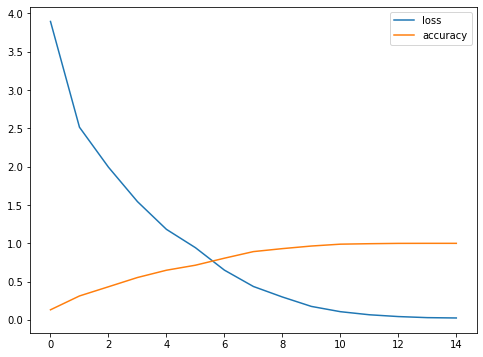

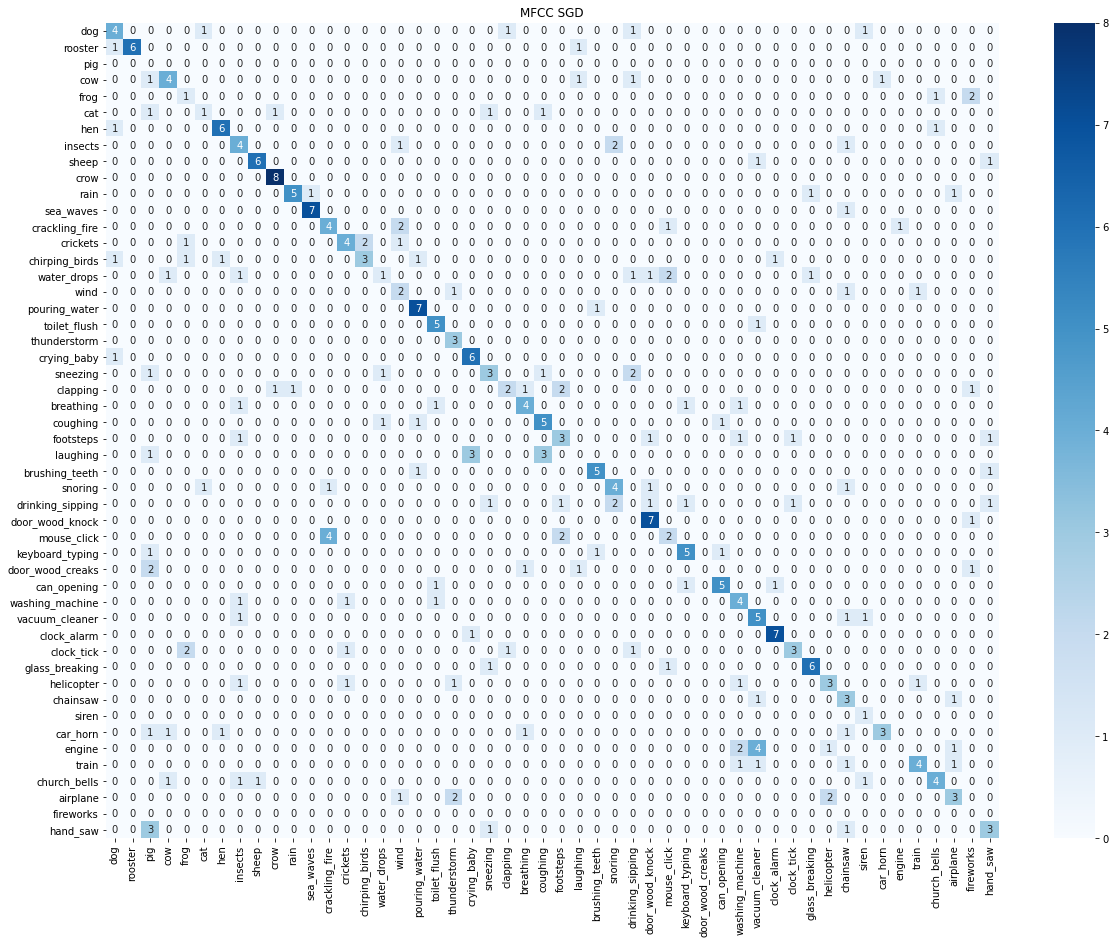

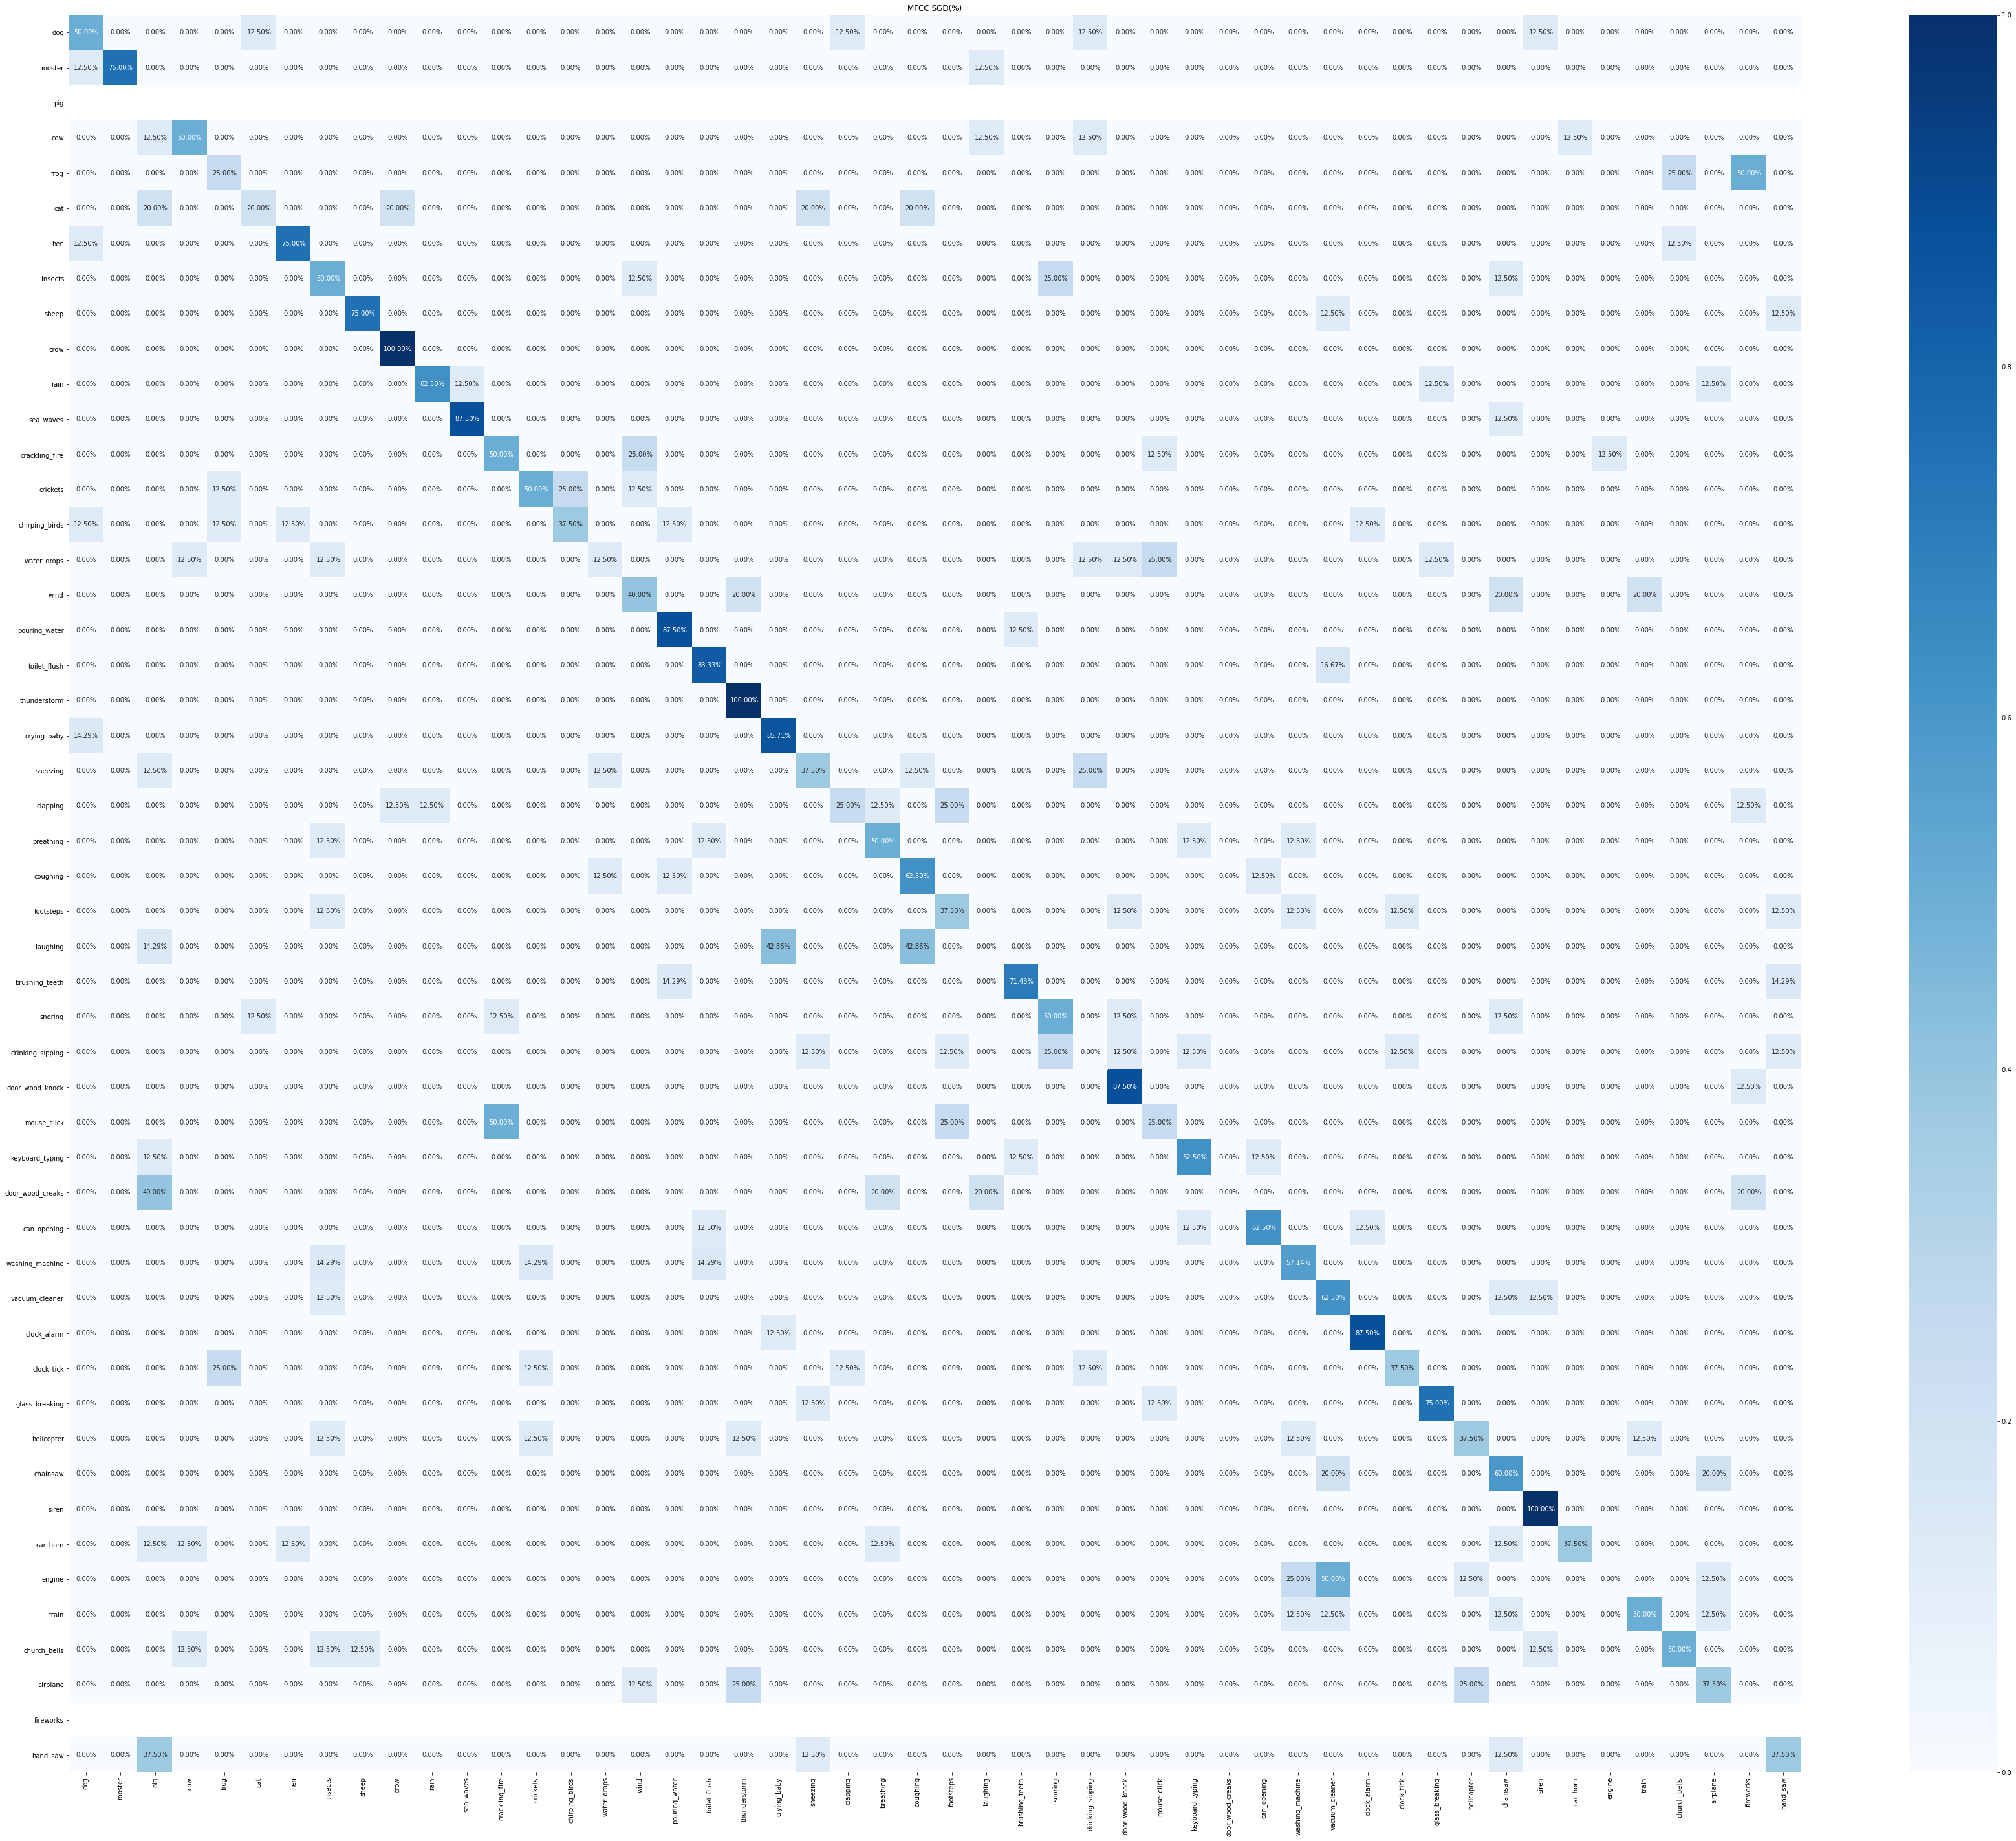

In [ ]:
plot_loss(history)

labels=['dog', 'rooster', 'pig', 'cow', 'frog', 'cat', 'hen', 'insects', 'sheep',
        'crow', 'rain', 'sea_waves', 'crackling_fire', 'crickets', 
        'chirping_birds', 'water_drops', 'wind', 'pouring_water',
        'toilet_flush', 'thunderstorm', 'crying_baby', 'sneezing', 'clapping',
        'breathing', 'coughing', 'footsteps', 'laughing', 'brushing_teeth',
        'snoring', 'drinking_sipping', 'door_wood_knock', 'mouse_click',
        'keyboard_typing', 'door_wood_creaks', 'can_opening', 'washing_machine',
        'vacuum_cleaner', 'clock_alarm', 'clock_tick', 'glass_breaking',
        'helicopter', 'chainsaw', 'siren', 'car_horn', 'engine', 'train',
        'church_bells', 'airplane', 'fireworks', 'hand_saw']
plot_heat_map(Y_ts, myAlex.predict(X_ts), labels)